# Model Training

## 1.1 Import Data and Required Packages


In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report
from sklearn.metrics import confusion_matrix

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
import matplotlib.pyplot as plt

from imblearn.over_sampling import SMOTE, RandomOverSampler
import warnings

In [2]:
df_features = pd.read_csv("data/train_values.csv")
df_labels = pd.read_csv("data/train_labels.csv")

In [3]:
df = pd.merge(df_features, df_labels, on='building_id')
df = df.drop(columns='building_id')

### Preparing X and y variables

In [4]:
X = df.drop(columns = ["damage_grade"])
y = df["damage_grade"]

In [5]:
### Sanity Check
print(f"Shape of X={(X.shape)}, Shape of y={(y.shape)}")

Shape of X=(260601, 38), Shape of y=(260601,)


### Convert categorical data to numerical data

In [6]:
cat_features = ['land_surface_condition', 'foundation_type', 'roof_type','ground_floor_type', 
                          'other_floor_type', 'position', 'plan_configuration', 'legal_ownership_status']
# label encoding categorical columns in train dataset 
X[cat_features] = X[cat_features].apply(lambda x: x.astype('category').cat.codes)

### Scaling the dataset

In [7]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

### Splitting into train, validation and test sets

In [17]:
RANDOM_SEED = 42
MODELS = {
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting Classifier": GradientBoostingClassifier(),
    "AdaBoost Classifier": AdaBoostClassifier(),
    "DecisionTree Classifier": DecisionTreeClassifier()
}

* Number of data points in Train set : 70 % of total no. of data points
* Number of data points in Validation set : 10 % of total no. of data points
* Number of data points in Test set : 20 % of total no. of data points


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

### Create an Evaluation function to give all metrics after model Training

In [10]:
def evaluate_model(true, predicted):
    """
    Generate the confusion matrix and classification report
    """
    cm = confusion_matrix(true, predicted)
    cr = classification_report(true, predicted)
    conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:1','Predicted:2','Predicted:3'],
                                         index=['Actual:1','Actual:2','Actual:3'])
    # confusion matrix in heatmap
    sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()
    print(cr) 
    f1_micro = f1_score(true, predicted, average='micro')
    return f1_micro

## Model Training

### Without over and under sampling

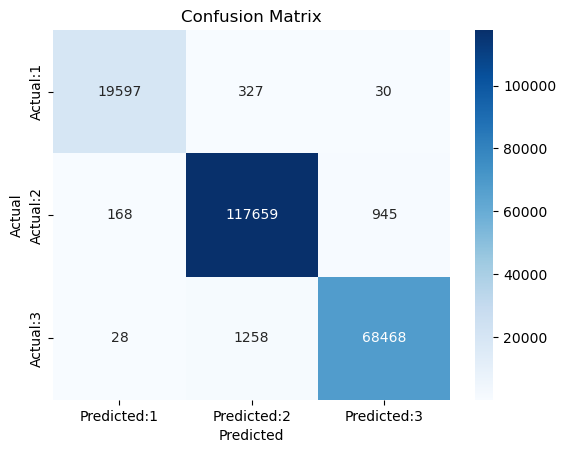

              precision    recall  f1-score   support

           1       0.99      0.98      0.99     19954
           2       0.99      0.99      0.99    118772
           3       0.99      0.98      0.98     69754

    accuracy                           0.99    208480
   macro avg       0.99      0.98      0.99    208480
weighted avg       0.99      0.99      0.99    208480



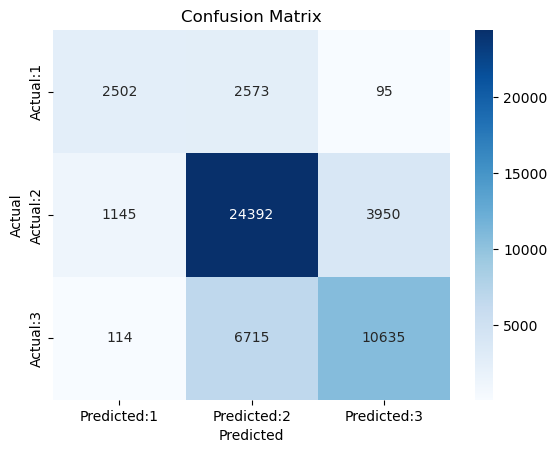

              precision    recall  f1-score   support

           1       0.67      0.48      0.56      5170
           2       0.72      0.83      0.77     29487
           3       0.72      0.61      0.66     17464

    accuracy                           0.72     52121
   macro avg       0.70      0.64      0.66     52121
weighted avg       0.72      0.72      0.71     52121

Random Forest
Model Performance for Training Set
F1 Micro-Averaged Score: 0.9868
--------------------------------------
Model Performance for Validation Set
F1 Micro-Averaged Score: 0.7200




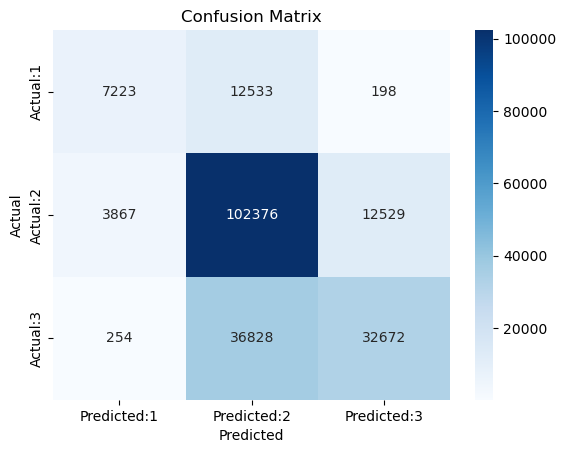

              precision    recall  f1-score   support

           1       0.64      0.36      0.46     19954
           2       0.67      0.86      0.76    118772
           3       0.72      0.47      0.57     69754

    accuracy                           0.68    208480
   macro avg       0.68      0.56      0.60    208480
weighted avg       0.69      0.68      0.67    208480



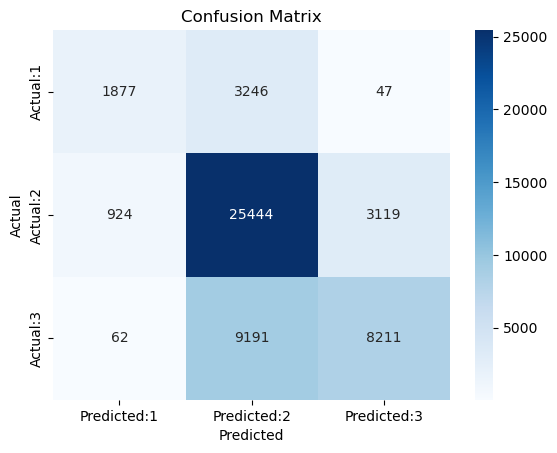

              precision    recall  f1-score   support

           1       0.66      0.36      0.47      5170
           2       0.67      0.86      0.76     29487
           3       0.72      0.47      0.57     17464

    accuracy                           0.68     52121
   macro avg       0.68      0.57      0.60     52121
weighted avg       0.69      0.68      0.66     52121

Gradient Boosting Classifier
Model Performance for Training Set
F1 Micro-Averaged Score: 0.6824
--------------------------------------
Model Performance for Validation Set
F1 Micro-Averaged Score: 0.6817




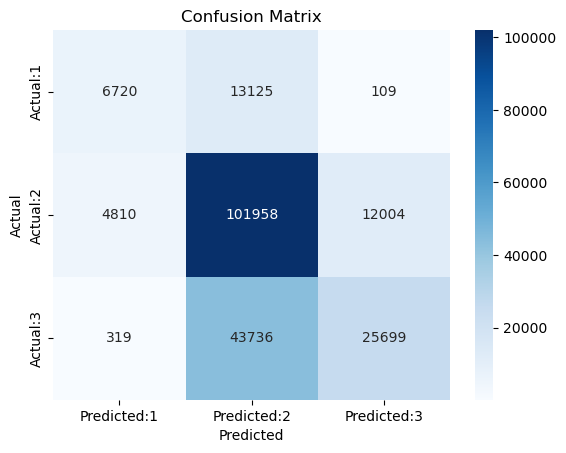

              precision    recall  f1-score   support

           1       0.57      0.34      0.42     19954
           2       0.64      0.86      0.73    118772
           3       0.68      0.37      0.48     69754

    accuracy                           0.64    208480
   macro avg       0.63      0.52      0.55    208480
weighted avg       0.65      0.64      0.62    208480



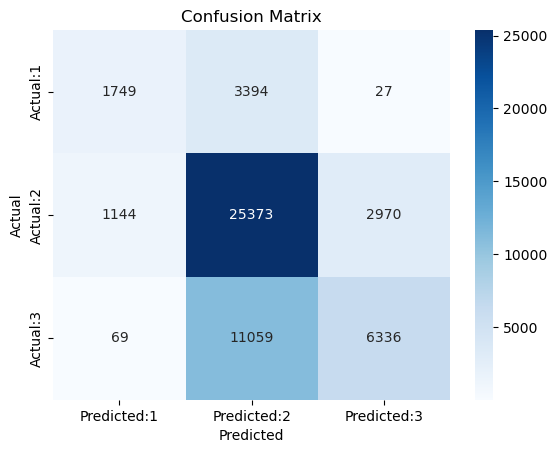

              precision    recall  f1-score   support

           1       0.59      0.34      0.43      5170
           2       0.64      0.86      0.73     29487
           3       0.68      0.36      0.47     17464

    accuracy                           0.64     52121
   macro avg       0.64      0.52      0.55     52121
weighted avg       0.65      0.64      0.62     52121

AdaBoost Classifier
Model Performance for Training Set
F1 Micro-Averaged Score: 0.6446
--------------------------------------
Model Performance for Validation Set
F1 Micro-Averaged Score: 0.6419




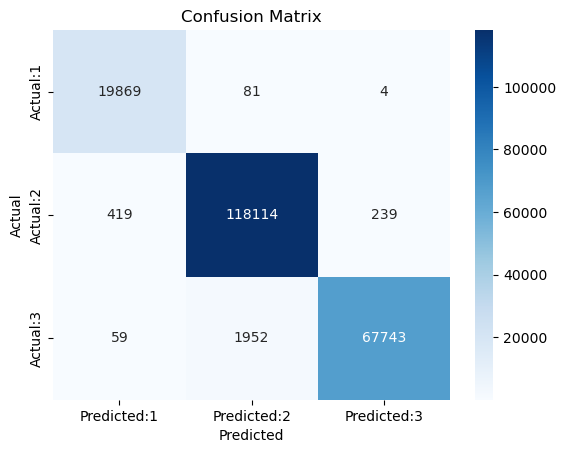

              precision    recall  f1-score   support

           1       0.98      1.00      0.99     19954
           2       0.98      0.99      0.99    118772
           3       1.00      0.97      0.98     69754

    accuracy                           0.99    208480
   macro avg       0.99      0.99      0.99    208480
weighted avg       0.99      0.99      0.99    208480



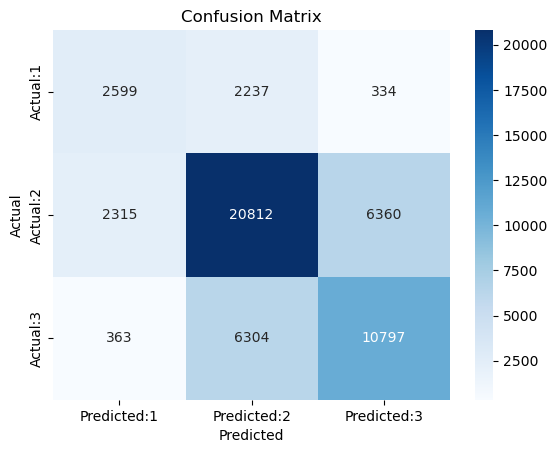

              precision    recall  f1-score   support

           1       0.49      0.50      0.50      5170
           2       0.71      0.71      0.71     29487
           3       0.62      0.62      0.62     17464

    accuracy                           0.66     52121
   macro avg       0.61      0.61      0.61     52121
weighted avg       0.66      0.66      0.66     52121

DecisionTree Classifier
Model Performance for Training Set
F1 Micro-Averaged Score: 0.9868
--------------------------------------
Model Performance for Validation Set
F1 Micro-Averaged Score: 0.6563




In [11]:
models = {
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting Classifier": GradientBoostingClassifier(),
    "AdaBoost Classifier": AdaBoostClassifier(),
    "DecisionTree Classifier": DecisionTreeClassifier()
}

model_list = []
f1_micro = []

for i in range(len(list(MODELS))):
    model = list(MODELS.values())[i]
    model.fit(X_train, y_train)
    
    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Validation dataset
    model_train_f1 = evaluate_model(y_train, y_train_pred)
    model_test_f1 = evaluate_model(y_test, y_test_pred)
    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print("Model Performance for Training Set")
    print("F1 Micro-Averaged Score: {:.4f}".format(model_train_f1))
    print("--------------------------------------")
    
    print("Model Performance for Validation Set")
    print("F1 Micro-Averaged Score: {:.4f}".format(model_test_f1))
    
    f1_micro.append(model_test_f1)
    
    print('='*35)
    print('\n')

### Results

In [12]:
results_without_sampling=pd.DataFrame(list(zip(model_list, f1_micro)), columns=['Model Name', 'Micro Averaged F1-Score']).sort_values(by=["Micro Averaged F1-Score"],ascending=False)
results_without_sampling

,Model Name,Micro Averaged F1-Score
0,Random Forest,0.720036
1,Gradient Boosting Classifier,0.681721
3,DecisionTree Classifier,0.656319
2,AdaBoost Classifier,0.641929


### ii. SMOTE technique

In [14]:
smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

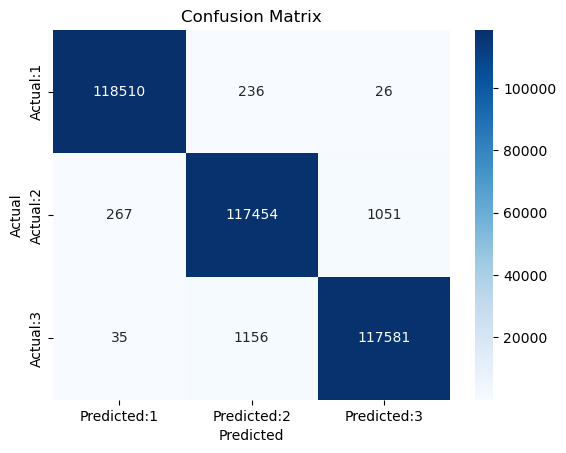

              precision    recall  f1-score   support

           1       1.00      1.00      1.00    118772
           2       0.99      0.99      0.99    118772
           3       0.99      0.99      0.99    118772

    accuracy                           0.99    356316
   macro avg       0.99      0.99      0.99    356316
weighted avg       0.99      0.99      0.99    356316



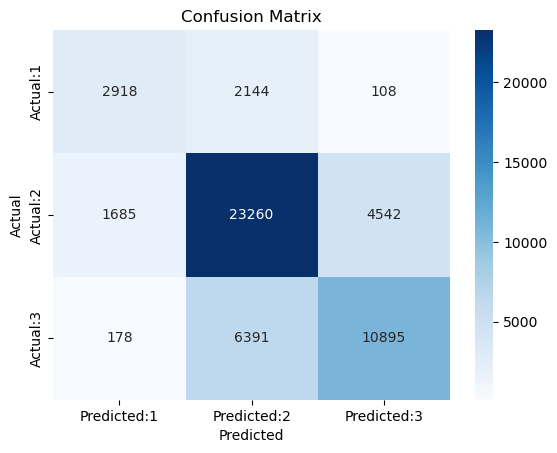

              precision    recall  f1-score   support

           1       0.61      0.56      0.59      5170
           2       0.73      0.79      0.76     29487
           3       0.70      0.62      0.66     17464

    accuracy                           0.71     52121
   macro avg       0.68      0.66      0.67     52121
weighted avg       0.71      0.71      0.71     52121

Random Forest
Model Performance for Training Set
F1 Micro-Averaged Score: 0.9922
--------------------------------------
Model Performance for Validation Set
F1 Micro-Averaged Score: 0.7113




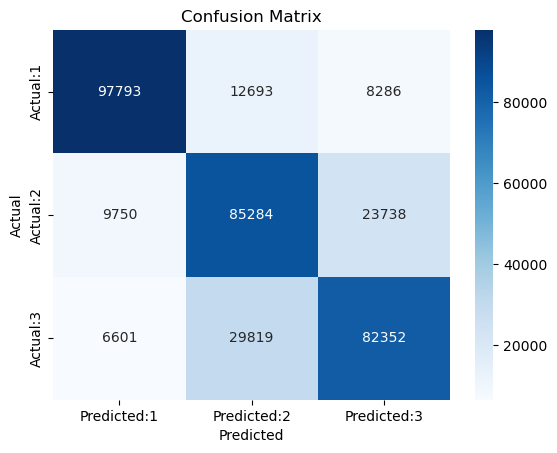

              precision    recall  f1-score   support

           1       0.86      0.82      0.84    118772
           2       0.67      0.72      0.69    118772
           3       0.72      0.69      0.71    118772

    accuracy                           0.74    356316
   macro avg       0.75      0.74      0.75    356316
weighted avg       0.75      0.74      0.75    356316



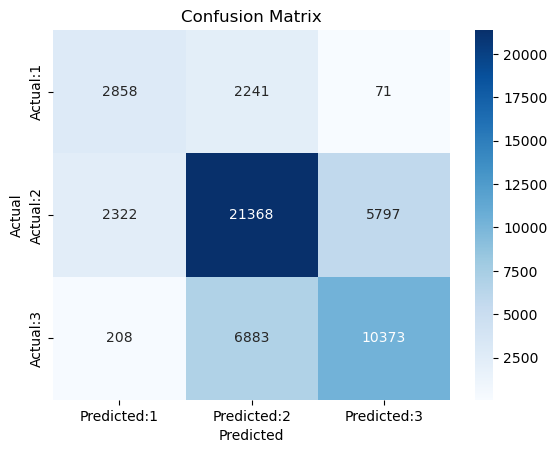

              precision    recall  f1-score   support

           1       0.53      0.55      0.54      5170
           2       0.70      0.72      0.71     29487
           3       0.64      0.59      0.62     17464

    accuracy                           0.66     52121
   macro avg       0.62      0.62      0.62     52121
weighted avg       0.66      0.66      0.66     52121

Gradient Boosting Classifier
Model Performance for Training Set
F1 Micro-Averaged Score: 0.7449
--------------------------------------
Model Performance for Validation Set
F1 Micro-Averaged Score: 0.6638




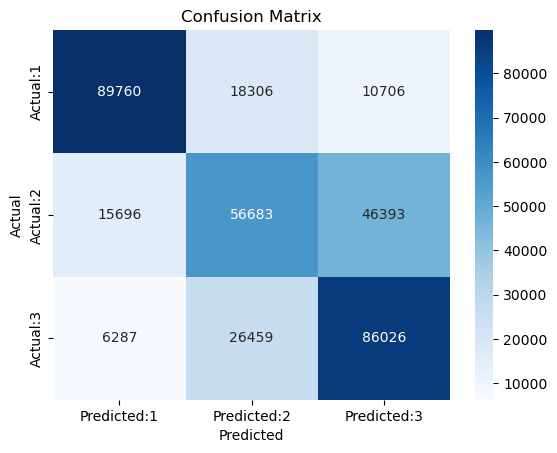

              precision    recall  f1-score   support

           1       0.80      0.76      0.78    118772
           2       0.56      0.48      0.51    118772
           3       0.60      0.72      0.66    118772

    accuracy                           0.65    356316
   macro avg       0.65      0.65      0.65    356316
weighted avg       0.65      0.65      0.65    356316



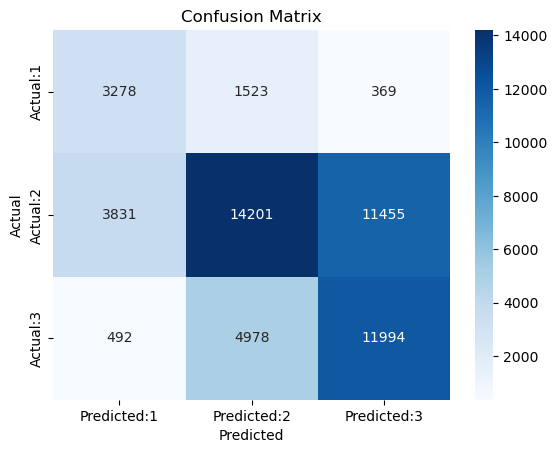

              precision    recall  f1-score   support

           1       0.43      0.63      0.51      5170
           2       0.69      0.48      0.57     29487
           3       0.50      0.69      0.58     17464

    accuracy                           0.57     52121
   macro avg       0.54      0.60      0.55     52121
weighted avg       0.60      0.57      0.57     52121

AdaBoost Classifier
Model Performance for Training Set
F1 Micro-Averaged Score: 0.6524
--------------------------------------
Model Performance for Validation Set
F1 Micro-Averaged Score: 0.5655




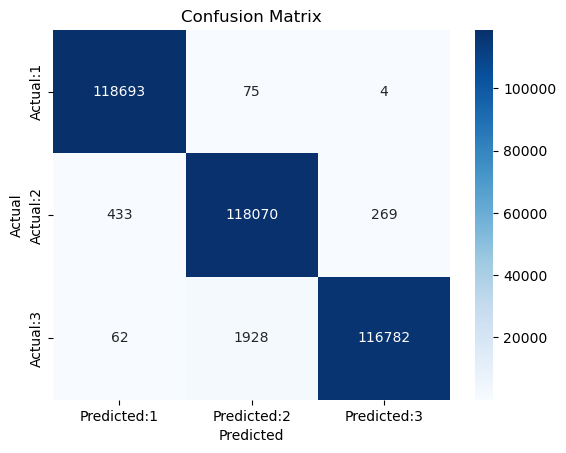

              precision    recall  f1-score   support

           1       1.00      1.00      1.00    118772
           2       0.98      0.99      0.99    118772
           3       1.00      0.98      0.99    118772

    accuracy                           0.99    356316
   macro avg       0.99      0.99      0.99    356316
weighted avg       0.99      0.99      0.99    356316



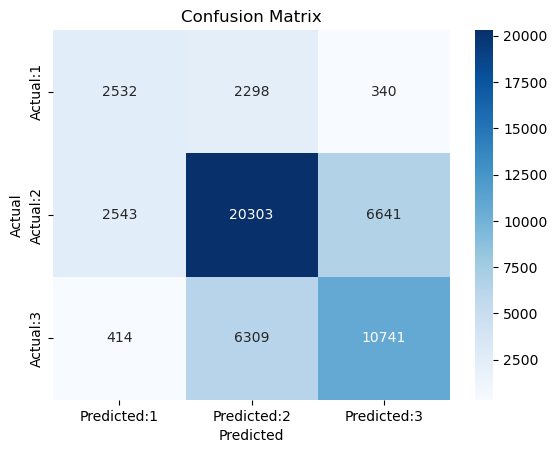

              precision    recall  f1-score   support

           1       0.46      0.49      0.48      5170
           2       0.70      0.69      0.70     29487
           3       0.61      0.62      0.61     17464

    accuracy                           0.64     52121
   macro avg       0.59      0.60      0.59     52121
weighted avg       0.65      0.64      0.65     52121

DecisionTree Classifier
Model Performance for Training Set
F1 Micro-Averaged Score: 0.9922
--------------------------------------
Model Performance for Validation Set
F1 Micro-Averaged Score: 0.6442




In [28]:
model_list = []
f1_micro = []

for i in range(len(list(MODELS))):
    model = list(MODELS.values())[i]
    model.fit(X_train_smote, y_train_smote)

    # Make predictions
    y_train_pred = model.predict(X_train_smote)
    y_test_pred = model.predict(X_test)

    # Evaluate Train and Validation dataset
    model_train_f1 = evaluate_model(y_train_smote, y_train_pred)
    model_test_f1 = evaluate_model(y_test, y_test_pred)

    print(list(MODELS.keys())[i])
    model_list.append(list(MODELS.keys())[i])

    print("Model Performance for Training Set")
    print("F1 Micro-Averaged Score: {:.4f}".format(model_train_f1))
    print("--------------------------------------")

    print("Model Performance for Validation Set")
    print("F1 Micro-Averaged Score: {:.4f}".format(model_test_f1))

    f1_micro.append(model_test_f1)

    print('='*35)
    print('\n')

In [29]:
results_with_smote = pd.DataFrame(list(zip(model_list, f1_micro)), columns=['Model Name', 'Micro Averaged F1-Score']).sort_values(by=["Micro Averaged F1-Score"],ascending=False)
results_with_smote

,Model Name,Micro Averaged F1-Score
0,Random Forest,0.711287
1,Gradient Boosting Classifier,0.663821
3,DecisionTree Classifier,0.644193
2,AdaBoost Classifier,0.565473
